### Save to Ocean Data View file
*Load a biofloat DataFrame, apply WOA calibrated gain factor, and save it as an ODV spreadsheet*

Use the local cache file for float 5903891 that drifted around ocean station Papa. It's the file that was produced for [compare_oxygen_calibrations.ipynb](compare_oxygen_calibrations.ipynb).

In [1]:
from biofloat import ArgoData, converters
from os.path import join, expanduser
ad = ArgoData(cache_file=join(expanduser('~'),'6881StnP_5903891.hdf'), verbosity=2)

In [2]:
wmo_list = ad.get_cache_file_all_wmo_list()
df = ad.get_float_dataframe(wmo_list)

INFO:root:Read all_wmo_list from cache
INFO:root:Using cache_file /home/mccann/6881StnP_5903891.hdf
INFO:root:Checking for updates at http://tds0.ifremer.fr/thredds/catalog/CORIOLIS-ARGO-GDAC-OBSaoml/5903891/profiles/catalog.xml
INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): tds0.ifremer.fr


 Show top 5 records.

In [3]:
df.head()

TEMP_ADJUSTED  \
wmo     time                       lon      lat    profile pressure                  
5903891 2015-11-25 07:15:06.019200 -135.904 52.172 196     8.17             9.7356   
                                                           11.70            9.7349   
                                                           17.22            9.7362   
                                                           22.12            9.7371   
                                                           27.17            9.7400   

                                                                     PSAL_ADJUSTED  \
wmo     time                       lon      lat    profile pressure                  
5903891 2015-11-25 07:15:06.019200 -135.904 52.172 196     8.17          32.296299   
                                                           11.70         32.296501   
                                                           17.22         32.296501   
                                                           22.12         32.296600   
                                                           27.17         32.296700   

                                                                     DOXY_ADJUSTED  
wmo     time                       lon      lat    profile pressure                 
5903891 2015-11-25 07:15:06.019200 -135.904 52.172 196     8.17         240.571793  
                                                           11.70        240.223999  
                                                           17.22        239.519196  
                                                           22.12        238.625793  
                                                           27.17        237.367599

Remove NaNs and apply the gain factor from [compare_oxygen_calibrations.ipynb](compare_oxygen_calibrations.ipynb).

In [4]:
corr_df = df.dropna().copy()
corr_df['DOXY_ADJUSTED'] *= 1.12
corr_df.head()

TEMP_ADJUSTED  \
wmo     time                       lon      lat    profile pressure                  
5903891 2015-11-25 07:15:06.019200 -135.904 52.172 196     8.17             9.7356   
                                                           11.70            9.7349   
                                                           17.22            9.7362   
                                                           22.12            9.7371   
                                                           27.17            9.7400   

                                                                     PSAL_ADJUSTED  \
wmo     time                       lon      lat    profile pressure                  
5903891 2015-11-25 07:15:06.019200 -135.904 52.172 196     8.17          32.296299   
                                                           11.70         32.296501   
                                                           17.22         32.296501   
                                                           22.12         32.296600   
                                                           27.17         32.296700   

                                                                     DOXY_ADJUSTED  
wmo     time                       lon      lat    profile pressure                 
5903891 2015-11-25 07:15:06.019200 -135.904 52.172 196     8.17         269.440408  
                                                           11.70        269.050879  
                                                           17.22        268.261499  
                                                           22.12        267.260889  
                                                           27.17        265.851711

Convert to ODV format and save in a .txt file.

In [5]:
converters.to_odv(corr_df, '6881StnP_5903891.txt')

Import as an ODV Spreadsheet and use the tool.

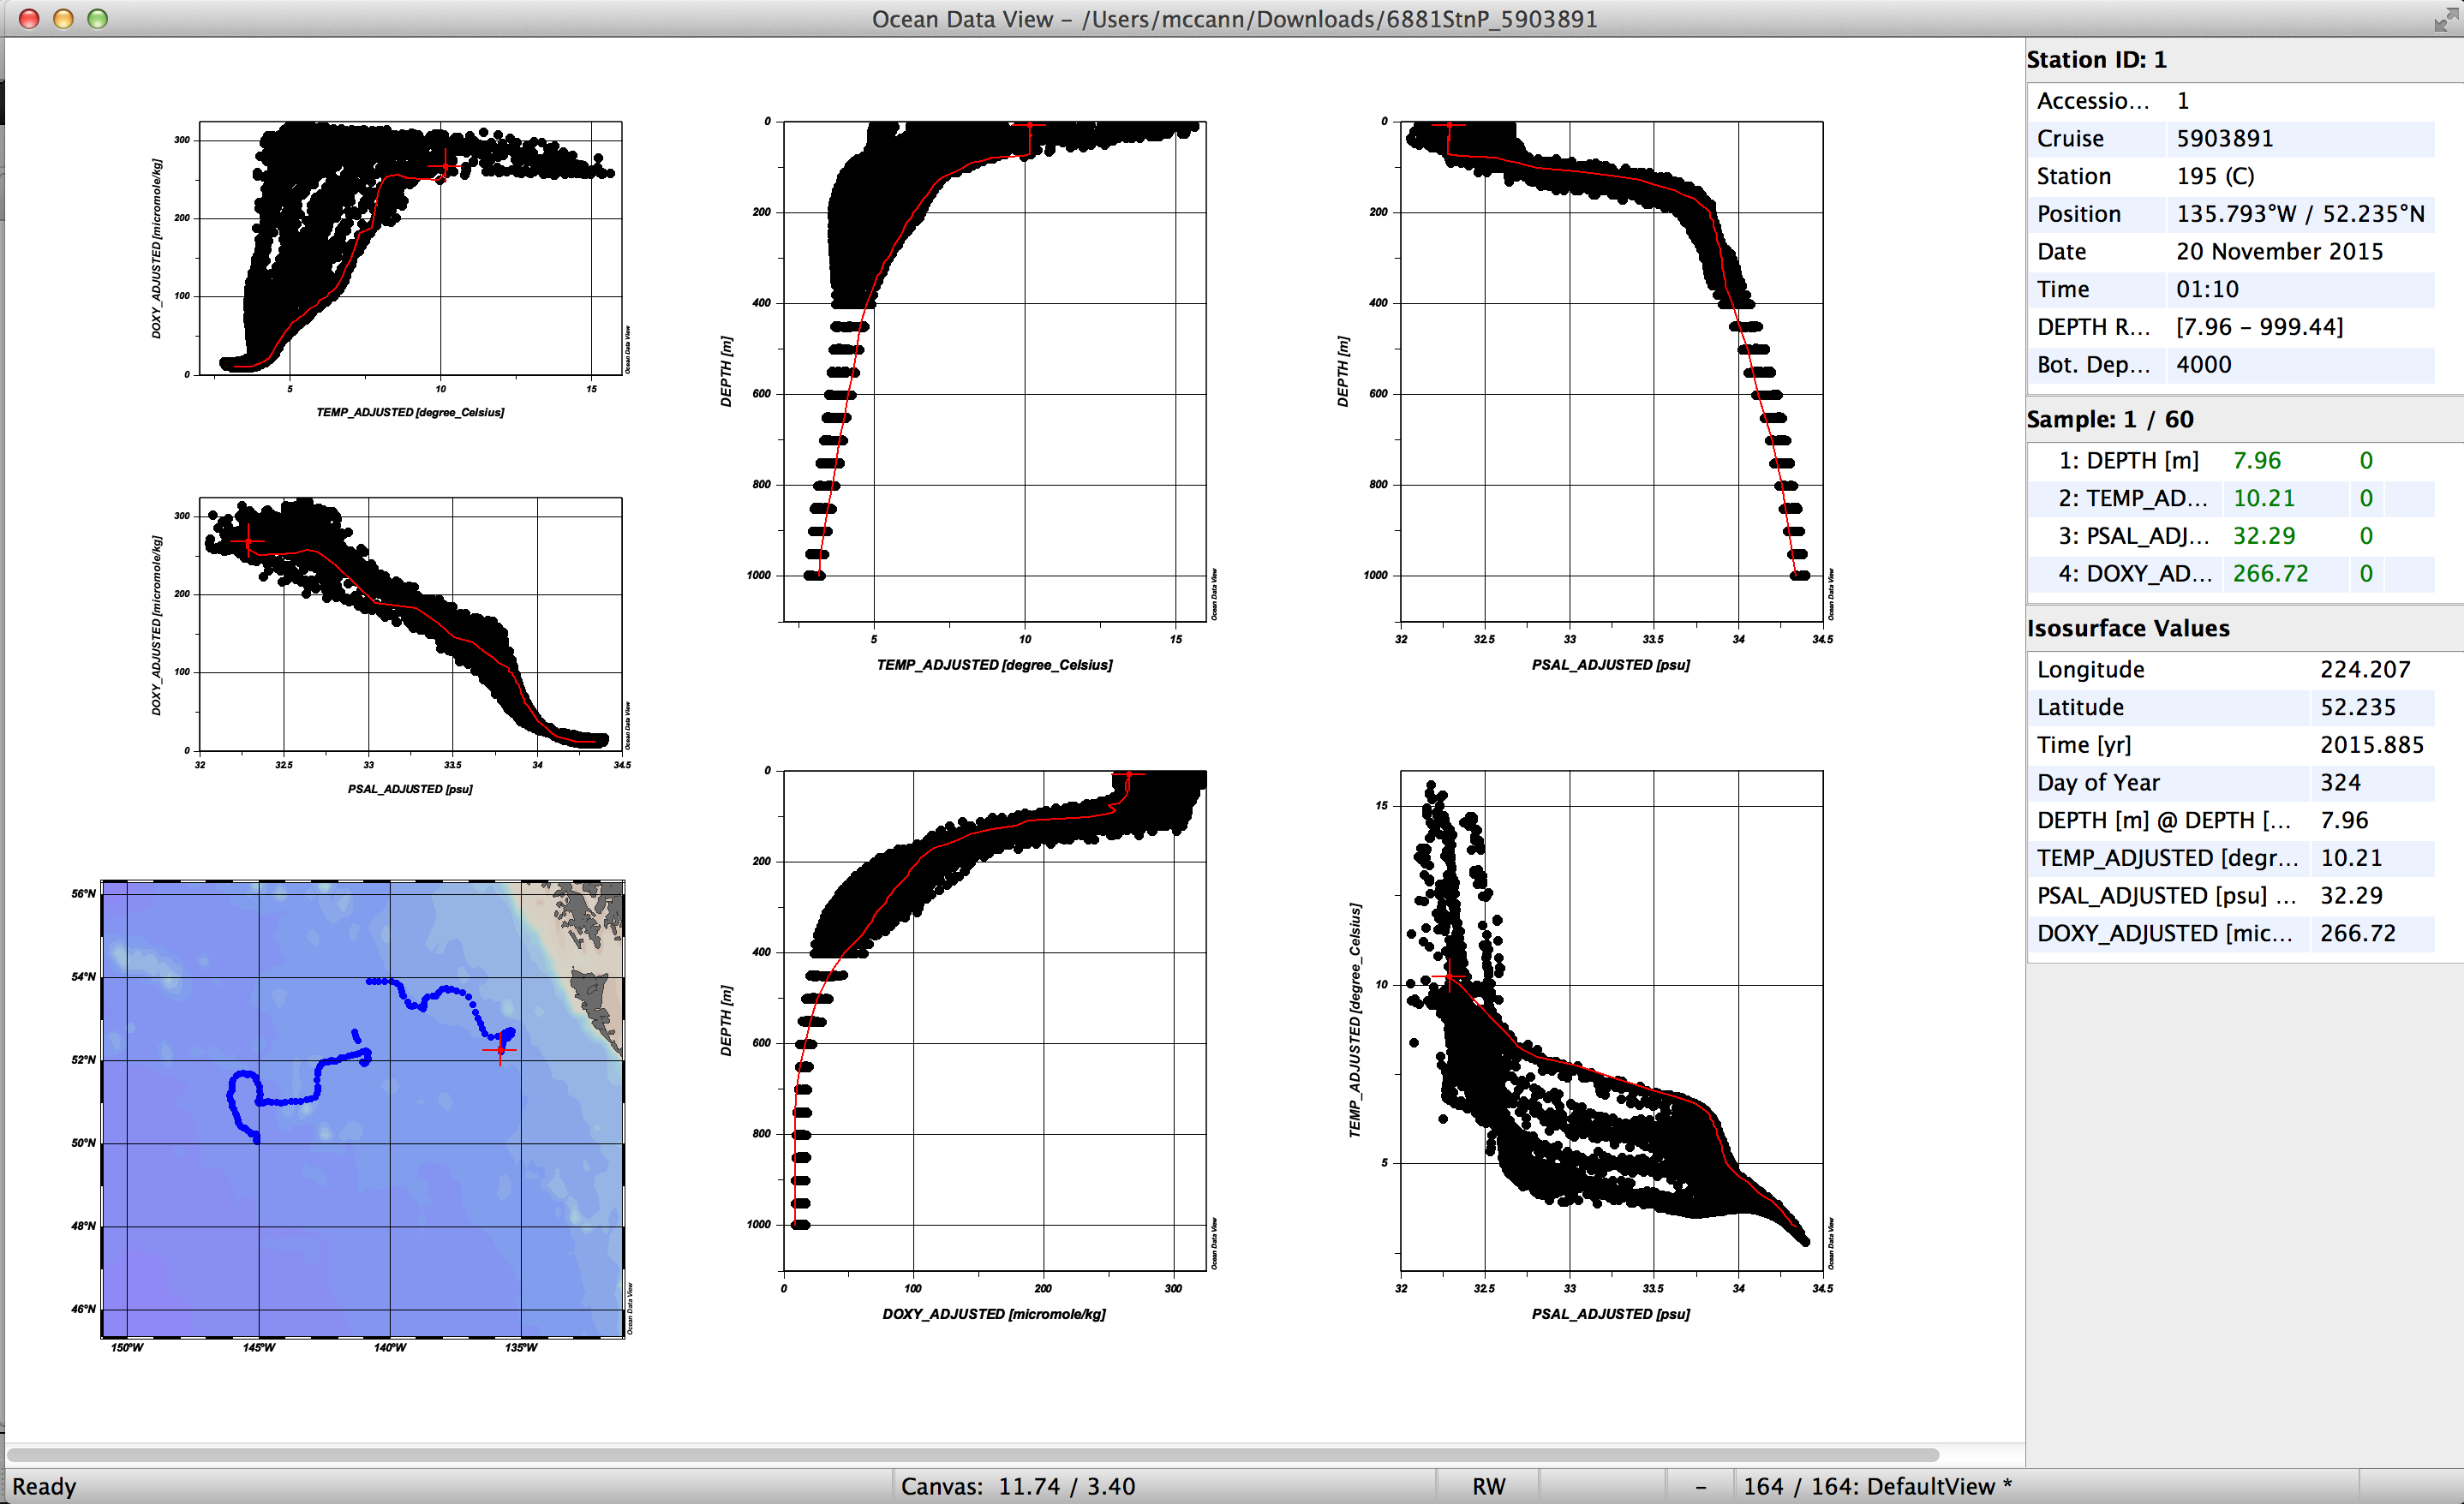

In [6]:
from IPython.display import Image
Image('../doc/screenshots/Screen_Shot_2015-11-25_at_1.42.00_PM.png')